#Import Library

In [11]:
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi

import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Conv1D, MaxPooling1D, Dropout,Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.ensemble import RandomForestClassifier
import torch
from transformers import BertTokenizer, BertModel, DistilBertTokenizer, DistilBertModel


In [12]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#Load Dataset

In [13]:
app_reviews = pd.read_csv('reviews.csv')
app_reviews

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,25a79429-51fd-4365-bd91-824c2ba5ea48,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Gw dapat bug yg aneh dan ngeganggu, pas di gam...",1,2971,1.9.64.10601,2025-03-20 15:42:10,NaN,NaN,1.9.64.10601
1,a68800f8-1058-45a6-bf23-4b32d3852070,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi eror tiba tiba freeze in ranked match...,1,390,1.9.64.10601,2025-03-20 15:54:45,NaN,NaN,1.9.64.10601
2,5a129e3c-dd0d-44f3-bf43-577462410a87,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,maaf untuk developer moonton tolong yang di co...,1,935,1.9.64.10601,2025-03-19 15:04:47,NaN,NaN,1.9.64.10601
3,ff582517-edc8-45fb-9f2a-26a520c57ab5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ku bikin bintang satu karena stuck di interfac...,1,285,1.9.64.10601,2025-03-20 14:45:40,NaN,NaN,1.9.64.10601
4,912fd28e-141d-4cc5-aed1-bb4c99707623,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Bagus sih efeknya tapi minimal kasih map baru ...,4,92,1.9.64.10601,2025-03-20 11:39:25,NaN,NaN,1.9.64.10601
...,...,...,...,...,...,...,...,...,...,...,...
10995,ba7ac4cd-153e-4fe7-8c2e-729cdf30f696,Riska Novianti,https://play-lh.googleusercontent.com/a/ACg8oc...,knp skrng stiap mau ganti fropil login ulang t...,4,0,1.9.43.10342,2025-01-06 07:28:24,NaN,NaN,1.9.43.10342
10996,52793c3f-0cec-4fef-96d1-026d5866bc60,Mbahsurep Areparep,https://play-lh.googleusercontent.com/a/ACg8oc...,Sebenernya game nya bagus tapi kenapa kalo aku...,4,0,1.9.43.10342,2025-01-29 03:03:06,NaN,NaN,1.9.43.10342
10997,e7c0af95-cc98-4795-a1ed-18fe721333e1,Jos Lian,https://play-lh.googleusercontent.com/a/ACg8oc...,Game nya bagus tapi tah kenapa kredit skor sya...,1,0,1.9.43.10342,2025-01-17 03:41:28,NaN,NaN,1.9.43.10342
10998,4315d5ae-a156-485b-93b5-6f070d79503f,Gretanathania Napitupulu,https://play-lh.googleusercontent.com/a-/ALV-U...,bagus.tpi agak susah mainkan herony adakah yg ...,5,0,1.9.43.10342,2025-01-09 16:49:55,NaN,NaN,1.9.43.10342


In [14]:
app_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              11000 non-null  object
 1   userName              11000 non-null  object
 2   userImage             11000 non-null  object
 3   content               11000 non-null  object
 4   score                 11000 non-null  int64 
 5   thumbsUpCount         11000 non-null  int64 
 6   reviewCreatedVersion  10995 non-null  object
 7   at                    11000 non-null  object
 8   replyContent          446 non-null    object
 9   repliedAt             446 non-null    object
 10  appVersion            10995 non-null  object
dtypes: int64(2), object(9)
memory usage: 945.4+ KB


In [15]:
app_reviews['reviewCreatedVersion'].value_counts()

,count
reviewCreatedVersion,
1.9.42.10341,2850
1.9.48.10373,2599
1.9.47.10372,1926
1.9.43.10342,879
1.9.33.10117,841
1.9.45.10344,642
1.9.29.10113,379
1.9.64.10601,361
19.2.21.104,285


In [16]:
app_reviews['appVersion'].value_counts()

,count
appVersion,
1.9.42.10341,2850
1.9.48.10373,2599
1.9.47.10372,1926
1.9.43.10342,879
1.9.33.10117,841
1.9.45.10344,642
1.9.29.10113,379
1.9.64.10601,361
19.2.21.104,285


In [17]:
app_reviews.fillna({'reviewCreatedVersion': '1.9.42.10341'}, inplace=True)
app_reviews.fillna({'appVersion': '1.9.42.10341	'}, inplace=True)

In [18]:
app_reviews=app_reviews.drop(columns=["replyContent","repliedAt"])

In [19]:
app_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              11000 non-null  object
 1   userName              11000 non-null  object
 2   userImage             11000 non-null  object
 3   content               11000 non-null  object
 4   score                 11000 non-null  int64 
 5   thumbsUpCount         11000 non-null  int64 
 6   reviewCreatedVersion  11000 non-null  object
 7   at                    11000 non-null  object
 8   appVersion            11000 non-null  object
dtypes: int64(2), object(7)
memory usage: 773.6+ KB


In [20]:
cleaned = app_reviews.copy()
cleaned

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,25a79429-51fd-4365-bd91-824c2ba5ea48,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Gw dapat bug yg aneh dan ngeganggu, pas di gam...",1,2971,1.9.64.10601,2025-03-20 15:42:10,1.9.64.10601
1,a68800f8-1058-45a6-bf23-4b32d3852070,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi eror tiba tiba freeze in ranked match...,1,390,1.9.64.10601,2025-03-20 15:54:45,1.9.64.10601
2,5a129e3c-dd0d-44f3-bf43-577462410a87,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,maaf untuk developer moonton tolong yang di co...,1,935,1.9.64.10601,2025-03-19 15:04:47,1.9.64.10601
3,ff582517-edc8-45fb-9f2a-26a520c57ab5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ku bikin bintang satu karena stuck di interfac...,1,285,1.9.64.10601,2025-03-20 14:45:40,1.9.64.10601
4,912fd28e-141d-4cc5-aed1-bb4c99707623,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Bagus sih efeknya tapi minimal kasih map baru ...,4,92,1.9.64.10601,2025-03-20 11:39:25,1.9.64.10601
...,...,...,...,...,...,...,...,...,...
10995,ba7ac4cd-153e-4fe7-8c2e-729cdf30f696,Riska Novianti,https://play-lh.googleusercontent.com/a/ACg8oc...,knp skrng stiap mau ganti fropil login ulang t...,4,0,1.9.43.10342,2025-01-06 07:28:24,1.9.43.10342
10996,52793c3f-0cec-4fef-96d1-026d5866bc60,Mbahsurep Areparep,https://play-lh.googleusercontent.com/a/ACg8oc...,Sebenernya game nya bagus tapi kenapa kalo aku...,4,0,1.9.43.10342,2025-01-29 03:03:06,1.9.43.10342
10997,e7c0af95-cc98-4795-a1ed-18fe721333e1,Jos Lian,https://play-lh.googleusercontent.com/a/ACg8oc...,Game nya bagus tapi tah kenapa kredit skor sya...,1,0,1.9.43.10342,2025-01-17 03:41:28,1.9.43.10342
10998,4315d5ae-a156-485b-93b5-6f070d79503f,Gretanathania Napitupulu,https://play-lh.googleusercontent.com/a-/ALV-U...,bagus.tpi agak susah mainkan herony adakah yg ...,5,0,1.9.43.10342,2025-01-09 16:49:55,1.9.43.10342


#Preprocessing

In [21]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove numbers


    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy","wkwk"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

    return stemmed_text
def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [22]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [23]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
cleaned['text_clean'] = cleaned['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
cleaned['text_casefoldingText'] = cleaned['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
cleaned['text_slangwords'] = cleaned['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
cleaned['text_tokenizingText'] = cleaned['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
cleaned['text_stopword'] = cleaned['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
cleaned['text_akhir'] = cleaned['text_stopword'].apply(toSentence)

In [24]:
cleaned

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,25a79429-51fd-4365-bd91-824c2ba5ea48,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Gw dapat bug yg aneh dan ngeganggu, pas di gam...",1,2971,1.9.64.10601,2025-03-20 15:42:10,1.9.64.10601,Gw dapat bug yg aneh dan ngeganggu pas di game...,gw dapat bug yg aneh dan ngeganggu pas di game...,saya dapat bug yang aneh dan ngeganggu pas di ...,"[saya, dapat, bug, yang, aneh, dan, ngeganggu,...","[bug, aneh, ngeganggu, pas, gameplay, rank, ga...",bug aneh ngeganggu pas gameplay rank game kaya...
1,a68800f8-1058-45a6-bf23-4b32d3852070,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi eror tiba tiba freeze in ranked match...,1,390,1.9.64.10601,2025-03-20 15:54:45,1.9.64.10601,Aplikasi eror tiba tiba freeze in ranked match...,aplikasi eror tiba tiba freeze in ranked match...,aplikasi eror tiba tiba freeze in ranked match...,"[aplikasi, eror, tiba, tiba, freeze, in, ranke...","[aplikasi, eror, freeze, ranked, match, koneks...",aplikasi eror freeze ranked match koneksi terp...
2,5a129e3c-dd0d-44f3-bf43-577462410a87,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,maaf untuk developer moonton tolong yang di co...,1,935,1.9.64.10601,2025-03-19 15:04:47,1.9.64.10601,maaf untuk developer moonton tolong yang di co...,maaf untuk developer moonton tolong yang di co...,maaf untuk developer moonton tolong yang di co...,"[maaf, untuk, developer, moonton, tolong, yang...","[maaf, developer, moonton, tolong, costom, mod...",maaf developer moonton tolong costom mode paus...
3,ff582517-edc8-45fb-9f2a-26a520c57ab5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ku bikin bintang satu karena stuck di interfac...,1,285,1.9.64.10601,2025-03-20 14:45:40,1.9.64.10601,Ku bikin bintang satu karena stuck di interfac...,ku bikin bintang satu karena stuck di interfac...,ku bikin bintang satu karena stuck di interfac...,"[ku, bikin, bintang, satu, karena, stuck, di, ...","[bikin, bintang, stuck, interface, dipakai, ma...",bikin bintang stuck interface dipakai main upd...
4,912fd28e-141d-4cc5-aed1-bb4c99707623,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Bagus sih efeknya tapi minimal kasih map baru ...,4,92,1.9.64.10601,2025-03-20 11:39:25,1.9.64.10601,Bagus sih efeknya tapi minimal kasih map baru ...,bagus sih efeknya tapi minimal kasih map baru ...,bagus sih efeknya tapi minimal kasih map baru ...,"[bagus, sih, efeknya, tapi, minimal, kasih, ma...","[bagus, efeknya, minimal, kasih, map, effect, ...",bagus efeknya minimal kasih map effect jan tip...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,ba7ac4cd-153e-4fe7-8c2e-729cdf30f696,Riska Novianti,https://play-lh.googleusercontent.com/a/ACg8oc...,knp skrng stiap mau ganti fropil login ulang t...,4,0,1.9.43.10342,2025-01-06 07:28:24,1.9.43.10342,knp skrng stiap mau ganti fropil login ulang t...,knp skrng stiap mau ganti fropil login ulang t...,kenapa skrng setiap mau ganti fropil login ula...,"[kenapa, skrng, setiap, mau, ganti, fropil, lo...","[skrng, ganti, fropil, login, ulang, terustolo...",skrng ganti fropil login ulang terustolong per...
10996,52793c3f-0cec-4fef-96d1-026d5866bc60,Mbahsurep Areparep,https://play-lh.googleusercontent.com/a/ACg8oc...,Sebenernya game nya bagus tapi kenapa kalo aku...,4,0,1.9.43.10342,2025-01-29 03:03:06,1.9.43.10342,Sebenernya game nya bagus tapi kenapa kalo aku...,sebenernya game nya bagus tapi kenapa kalo aku...,sebenernya game nya bagus tapi kenapa kalau ak...,"[sebenernya, game, nya, bagus, tapi, kenapa, k...","[sebenernya, game, bagus, main, kalah, bikin, ...",sebenernya game bagus main kalah bikin emosi s...
10997,e7c0af95-cc98-4795-a1ed-18fe721333e1,Jos Lian,https://play-lh.googleusercontent.com/a/ACg8oc...,Game nya bagus tapi tah kenapa kredit skor sya...,1,0,1.9.43.103

#Pelabelan

In [25]:
import csv
import requests
from io import StringIO

# Loads positive lexicon data from GitHub
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Loads negative lexicon data from GitHub
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya ke dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")


In [26]:
# Function to determine sentiment polarity of tweets
# Fungsi untuk menentukan polaritas sentimen dari tweet

def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:

    score = 0
    # Inisialisasi skor sentimen ke 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''
    # Inisialisasi variabel polaritas

    if (score > 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif

    else:
         polarity = 'netral'
     #Ini adalah bagian yang bisa digunakan untuk menentukan polaritas netral jika diperlukan

    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [27]:
results = cleaned['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
cleaned['polarity_score'] = results[0]
cleaned['polarity'] = results[1]
print(cleaned['polarity'].value_counts())

polarity
negative    7437
positive    3018
netral       545
Name: count, dtype: int64


In [28]:
cleaned['polarity'].value_counts()

,count
polarity,
negative,7437
positive,3018
netral,545


<function matplotlib.pyplot.show(close=None, block=None)>

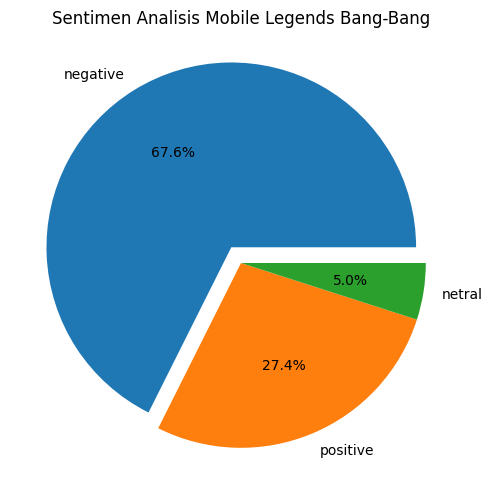

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 6))
jumlah = [count for count in cleaned['polarity'].value_counts()]

label = list(cleaned['polarity'].value_counts().index)

explode = (0.1, 0, 0)
ax.pie(x=jumlah,labels=label,autopct='%1.1f%%',explode=explode)
ax.set_title('Sentimen Analisis Mobile Legends Bang-Bang')
plt.show

In [30]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'positive_tweets' yang hanya berisi tweet dengan polaritas positif.
positive_tweets = cleaned[cleaned['polarity'] == 'positive']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'positive_tweets'.
positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'positive_tweets' berdasarkan 'polarity_score' secara menurun.
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
positive_tweets = positive_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
positive_tweets.index += 1

In [31]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'negative_tweets' yang hanya berisi tweet dengan polaritas negatif.
negative_tweets = cleaned[cleaned['polarity'] == 'negative']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'negative_tweets'.
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'negative_tweets' berdasarkan 'polarity_score' secara menaik (ascending).
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)

# Memilih 10 baris pertama dari DataFrame yang sudah diurutkan.
negative_tweets = negative_tweets[0:10]

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
negative_tweets = negative_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
negative_tweets.index += 1

In [32]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'negative_tweets' yang hanya berisi tweet dengan polaritas negatif.
neutral_tweets = cleaned[cleaned['polarity'] == 'netral']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'negative_tweets'.
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'negative_tweets' berdasarkan 'polarity_score' secara menaik (ascending).
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)

# Memilih 10 baris pertama dari DataFrame yang sudah diurutkan.
negative_tweets = negative_tweets[0:10]

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
negative_tweets = negative_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
negative_tweets.index += 1

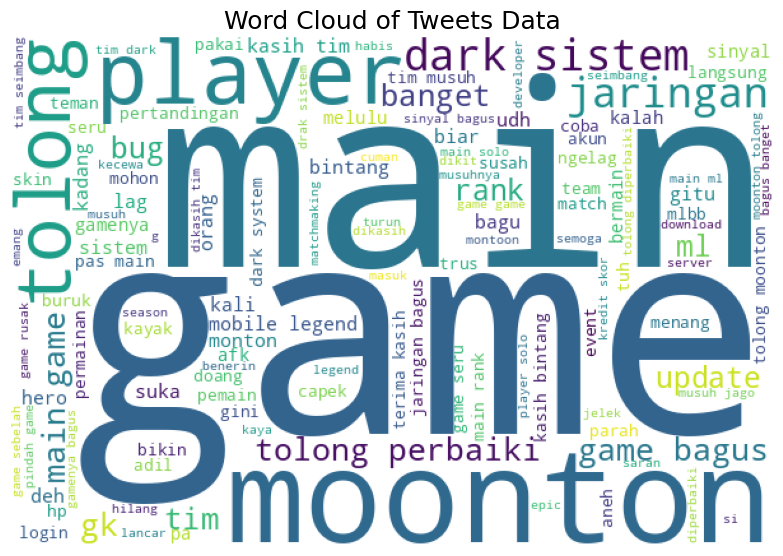

In [33]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan.
list_words = ' '.join([' '.join(tweet) for tweet in cleaned['text_stopword']])


# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white',max_words=500, min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

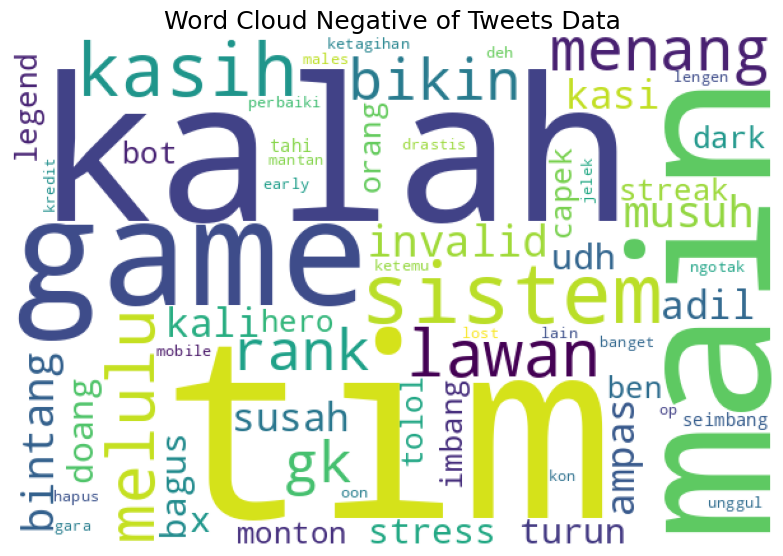

In [34]:

list_words = ' '.join([' '.join(tweet) for tweet in negative_tweets['text_stopword']])


# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white',max_words=500, min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud Negative of Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

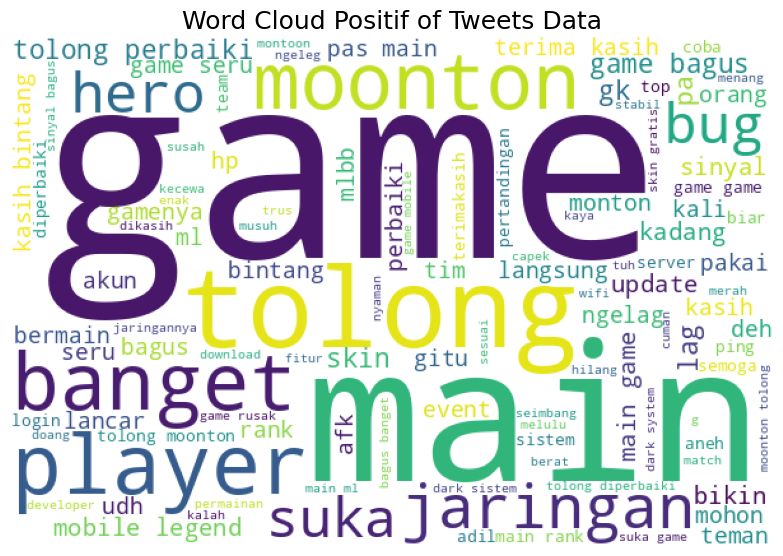

In [35]:

list_words = ' '.join([' '.join(tweet) for tweet in positive_tweets['text_stopword']])


# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white',max_words=500, min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud Positif of Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

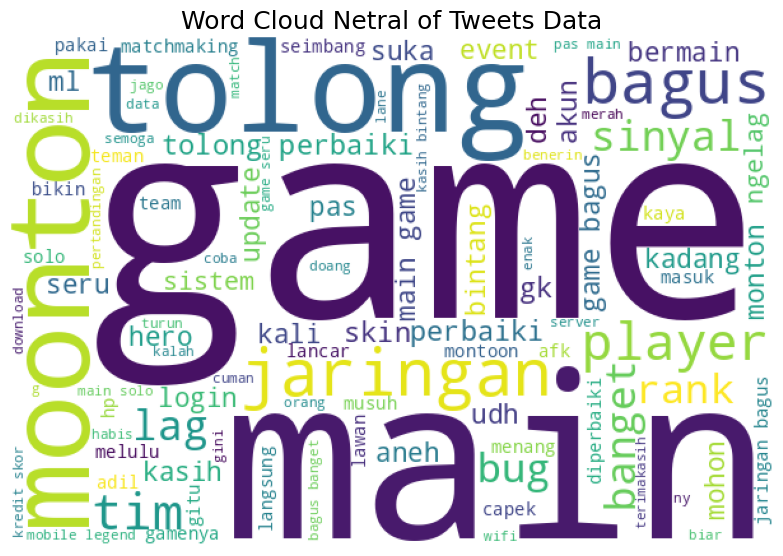

In [36]:

list_words = ' '.join([' '.join(tweet) for tweet in neutral_tweets['text_stopword']])


# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white',max_words=500, min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud Netral of Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

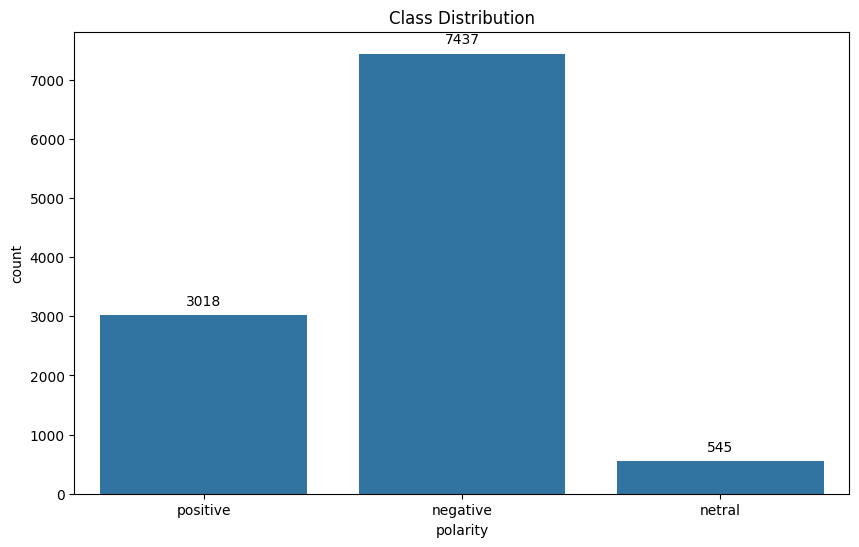

In [37]:
plt.figure(figsize=(10, 6))

class_dist_plot = sns.countplot(x='polarity', data=cleaned)
plt.title('Class Distribution')

# Add counts above the bars on the plot
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')

plt.show()


#Pelatihan

In [38]:
cleaned

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity
0,25a79429-51fd-4365-bd91-824c2ba5ea48,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Gw dapat bug yg aneh dan ngeganggu, pas di gameplay rank, awal game kayak aman aja, tapi pas lagi mau ngambil turtle pertama malah jaringan gw tiba-tiba jelek, kecepatan jaringan nya sampe² 0.50 sampai 1,0 KB/dtk, gak pernah di atas 50 KB/dtk, pas coba keluar dari game tersebut dan coba pake aplikasi online lainnya, ternyata jaringannya bagus. Eh pas mau login ulang ke game malah gak mau masuk ke in game, Ngestuck di loading awal aja, tapi bukan loading in match. dan jaringannya tetep rendah.",1,2971,1.9.64.10601,2025-03-20 15:42:10,1.9.64.10601,Gw dapat bug yg aneh dan ngeganggu pas di gameplay rank awal game kayak aman aja tapi pas lagi mau ngambil turtle pertama malah jaringan gw tibatiba jelek kecepatan jaringan nya sampe² sampai KBdtk gak pernah di atas KBdtk pas coba keluar dari game tersebut dan coba pake aplikasi online lainnya ternyata jaringannya bagus Eh pas mau login ulang ke game malah gak mau masuk ke in game Ngestuck di loading awal aja tapi bukan loading in match dan jaringannya tetep rendah,gw dapat bug yg aneh dan ngeganggu pas di gameplay rank awal game kayak aman aja tapi pas lagi mau ngambil turtle pertama malah jaringan gw tibatiba jelek kecepatan jaringan nya sampe² sampai kbdtk gak pernah di atas kbdtk pas coba keluar dari game tersebut dan coba pake aplikasi online lainnya ternyata jaringannya bagus eh pas mau login ulang ke game malah gak mau masuk ke in game ngestuck di loading awal aja tapi bukan loading in match dan jaringannya tetep rendah,saya dapat bug yang aneh dan ngeganggu pas di gameplay rank awal game kayak aman saja tapi pas lagi mau mengambil turtle pertama bahkan jaringan saya tibatiba jelek kecepatan jaringan nya sampe² sampai kbdtk gak pernah di atas kbdtk pas coba keluar dari game tersebut dan coba pakai aplikasi online lainnya ternyata jaringannya bagus eh pas mau login ulang ke game bahkan gak mau masuk ke in game ngestuck di loading awal saja tapi bukan loading in match dan jaringannya tetep rendah,"[saya, dapat, bug, yang, aneh, dan, ngeganggu, pas, di, gameplay, rank, awal, game, kayak, aman, saja, tapi, pas, lagi, mau, mengambil, turtle, pertama, bahkan, jaringan, saya, tibatiba, jelek, kecepatan, jaringan, nya, sampe², sampai, kbdtk, gak, pernah, di, atas, kbdtk, pas, coba, keluar, dari, game, tersebut, dan, coba, pakai, aplikasi, online, lainnya, ternyata, jaringannya, bagus, eh, pas, mau, login, ulang, ke, game, bahkan, gak, mau, masuk, ke, in, game, ngestuck, di, loading, awal, saja, tapi, bukan, loading, in, match, dan, jaringannya, tetep, rendah]","[bug, aneh, ngeganggu, pas, gameplay, rank, game, kayak, aman, pas, mengambil, turtle, jaringan, tibatiba, jelek, kecepatan, jaringan, sampe², kbdtk, kbdtk, pas, coba, game, coba, pakai, aplikasi, online, jaringannya, bagus, eh, pas, login, ulang, game, masuk, game, ngestuck, loading, loading, match, jaringannya, tetep, rendah]",bug aneh ngeganggu pas gameplay rank game kayak aman pas mengambil turtle jaringan tibatiba jelek kecepatan jaringan sampe² kbdtk kbdtk pas coba game coba pakai aplikasi online jaringannya bagus eh pas login ulang game masuk game ngestuck loading loading match jaringannya tetep rendah,2,positive
1,a68800f8-1058-45a6-bf23-4b32d3852070,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Aplikasi eror tiba tiba freeze in ranked match koneksi terputus padahal jaringan lancar, saya coba laporkan masih belum bisa soalnya battle id tidak keluar padahal sudah 10 menit. Kondisi tidak dapat main lagi karena terhitung masih dalam pertandingan. Bug ter 

##SVM +TF-IDF

In [39]:
X = cleaned['text_akhir']
y = cleaned['polarity']

In [40]:
tfidf = TfidfVectorizer(max_features=5000, min_df=5, max_df=0.9 )
X_tfidf = tfidf.fit_transform(X)

In [41]:
ekstrak = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
ekstrak

,abadi,abaikan,abang,acak,account,adain,adakan,adik,adil,adilan,...,yh,yin,yng,youtube,yt,yth,yu,yuk,yutub,zilong
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
X_train,X_test,y_train,y_test = train_test_split( X_tfidf, y, test_size=0.2, random_state=42)

In [43]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train.toarray(), y_train)
# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_svm = svm_model.predict(X_train.toarray())
y_pred_test_svm = svm_model.predict(X_test.toarray())

# Evaluasi akurasi
accuracy_train_svm = accuracy_score(y_pred_train_svm, y_train)
accuracy_test_svm = accuracy_score(y_pred_test_svm, y_test)

# Menampilkan akurasi
print('SVM - accuracy_train:', accuracy_train_svm)
print('SVM - accuracy_test:', accuracy_test_svm)


SVM - accuracy_train: 0.9210227272727273
SVM - accuracy_test: 0.8613636363636363


##Logistic Regression+TF-IDF

In [44]:
X = cleaned['text_akhir']
y = cleaned['polarity']

In [45]:
tfidf = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.9 )
X_tfidf = tfidf.fit_transform(X)

In [46]:
ekstrak = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
ekstrak

,abadi,abang,acak,adain,adakan,adik,adil,adill,admin,adu,...,ws,yaaa,yah,yahh,yakali,yh,yng,youtube,yt,zilong
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
X_train,X_test,y_train,y_test = train_test_split( X_tfidf, y, test_size=0.3, random_state=42)

In [48]:
from sklearn.linear_model import LogisticRegression

# Membuat objek model Logistic Regression
logistic_regression = LogisticRegression()

# Melatih model Logistic Regression pada data pelatihan
logistic_regression.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

Logistic Regression - accuracy_train: 0.9064935064935065
Logistic Regression - accuracy_test: 0.8575757575757575


##LSTM

In [49]:
# Mapping label: positive=2, neutral=1, negative=0
label_mapping = {'positive': 2, 'netral': 1, 'negative': 0}
cleaned['label_num'] = cleaned['polarity'].map(label_mapping)

# Pastikan tidak ada null
print("Cek null label:", cleaned['label_num'].isnull().sum())

# Konversi label ke array integer
y = cleaned['label_num'].astype('int32').values

Cek null label: 0


In [50]:

# Set parameter tokenisasi
max_vocab = 5000
max_len = 100

tokenizer = Tokenizer(num_words=max_vocab, oov_token='<OOV>')
tokenizer.fit_on_texts(cleaned['text_akhir'])  # 'text_akhir' = token hasil preprocessing

sequences = tokenizer.texts_to_sequences(cleaned['text_akhir'])
X = pad_sequences(sequences, maxlen=max_len, padding='post')


In [59]:
import pickle
with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

In [53]:
# Model
model = Sequential()
model.add(Embedding(input_dim=max_vocab, output_dim=256, input_length=max_len))
model.add(LSTM(256, return_sequences = True))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(128)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu',kernel_regularizer='l2'))
model.add(Dense(3, activation='softmax'))  # Output 3 kelas

# Compile
optimizer='adam',
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr= ReduceLROnPlateau(monitor='val_loss',factor=0.5,patience=2,min_lr=1e-5)

# Training
history = model.fit(X_train, y_train_cat, epochs=100, batch_size=364,
                    validation_data=(X_test, y_test_cat), callbacks=[early_stop])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 149s 6s/step - accuracy: 0.5926 - loss: 2.2542 - val_accuracy: 0.6632 - val_loss: 1.6366
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 121s 5s/step - accuracy: 0.6825 - loss: 1.4867 - val_accuracy: 0.6541 - val_loss: 1.1583
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 140s 5s/step - accuracy: 0.7141 - loss: 1.0347 - val_accuracy: 0.6991 - val_loss: 0.9462
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 144s 5s/step - accuracy: 0.7612 - loss: 0.7966 - val_accuracy: 0.8032 - val_loss: 0.6431
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 143s 5s/step - accuracy: 0.8059 - loss: 0.6335 - val_accuracy: 0.8109 - val_loss: 0.5717
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 121s 5s/step - accuracy: 0.8442 - loss: 0.5074 - val_accuracy: 0.8291 - val_loss: 0.5275
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 144s 5s/step - accuracy: 0.8496 - loss: 0.4721 - val_accuracy: 0.8400 - val_loss: 0.4798
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 121s 5s/step - accuracy: 0.8847 - loss: 0.3873 - val_accuracy: 0.

In [54]:
# Evaluasi akurasi test
loss, accuracy = model.evaluate(X_test, y_test_cat)
print("Akurasi Test LSTM:", accuracy)


69/69 ━━━━━━━━━━━━━━━━━━━━ 14s 203ms/step - accuracy: 0.8647 - loss: 0.4102
Akurasi Test LSTM: 0.8631818294525146


In [57]:
model.save('akurasi_terbaik.h5')

#Perbandingan

In [55]:
# Membuat DataFrame untuk hasil akurasi
results_df = pd.DataFrame({
    'Model': ['SVM', 'Logistic Regresion', 'LSTM'],
    'Accuracy Test': [accuracy_test_svm, accuracy_test_lr, accuracy]
})
# Menampilkan hanya kolom "Accuracy Test"
accuracy_test_only = results_df[['Model', 'Accuracy Test']]
print(accuracy_test_only)

                Model  Accuracy Test
0                 SVM       0.861364
1  Logistic Regresion       0.857576
2                LSTM       0.863182


In [56]:
# Mengurutkan DataFrame berdasarkan kolom "Accuracy Test" dari tertinggi ke terendah
accuracy_test_sorted = accuracy_test_only.sort_values(by='Accuracy Test', ascending=False)

# Menampilkan DataFrame yang telah diurutkan
print(accuracy_test_sorted)


                Model  Accuracy Test
2                LSTM       0.863182
0                 SVM       0.861364
1  Logistic Regresion       0.857576
